In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
X = df.iloc[:, 2:4].values

In [7]:
X

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

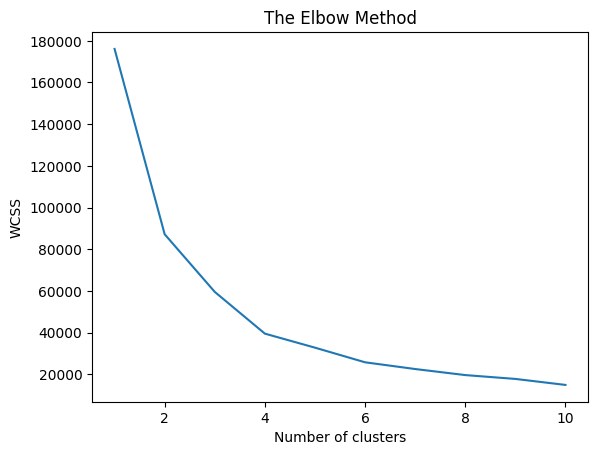

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

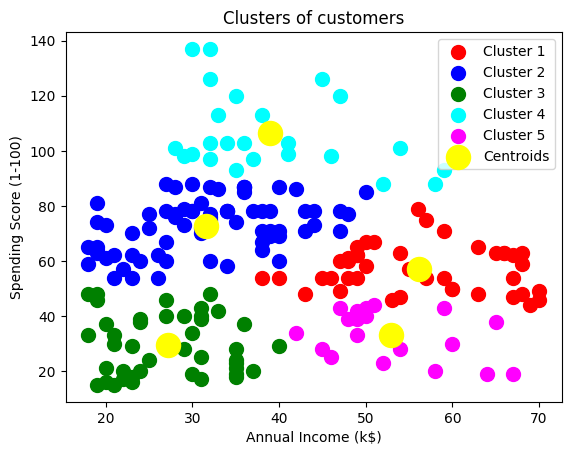

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()